# Assignment 8

### Task: Develop a machine learning model for classifying firewall rules into different categories such as Allow, Drop, and Deny.

# **Objective**
### *State the main objective of the machine learning model in this scenario.*
The main objective of the machine learning model in this project is to allow predicting and classifying the firewall rules into different categories.
### *Why is automating the classification of firewall rules using machine learning beneficial?*
The benefits of classifying the firewall rules using machine learning are:



1.   **Efficiency:** Machine Learning can analyze more amount of information than humans can do.
2.   **Accuracy:** Using a mix of models, the user can get a good accuracy on classification.
3.   **Scalability:** Machine Learning Models are highly scalable, and therefore this type of classification can scale with the number of firewall rules easily.
4.   **Optimization:** Security Teams can focus on other crucial tasks such as Incident Response while ML takes care of their classification needs.





In [216]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import itertools


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# **Dataset**

### *Provide a brief overview of the dataset, including the features it contains.*

The dataset has 12 columns, and a total of 262128 rows. The following are the rows:

- **Source Port**: The port number on the sender's side
- **Destination Port**: The port number on the receiver's side
- **NAT Source Port**: The Network Address Translation (NAT) translated source port.
- **NAT Destination Port**: The Network Address Translation (NAT) translated destination port.
- **Bytes**: The total number of bytes transferred
- **Bytes Sent**: The number of bytes sent
- **Bytes Received**: The number of bytes received
- **Packets**: The total number of packets transferred
- **Elapsed Time (sec)**: The duration of the communication in seconds
- **pkts_sent**: The number of packets sent
- **pkts_received**: The number of packets received
- **Class**: Label to classify the rule (Allow, Drop, Deny, Reset-both). The counts of the classes are as follows
  *   allow         150314
  *   deny           60053
  *   drop           51539
  *   reset-both       222

### *Explain the use of LabelEncoder in preprocessing the data.*
As you can see, the only non-integer column is Class, which is of the type object. Therefore, we require the use of LabelEncoder in this project. This will allow us to encode the categorical column "Class" to be represented into numerical representations. This will ensure easier processing of the column by the Machine Learning Models we are about to use.

In [217]:
# Load the dataset
firewall_df = pd.read_csv('data.csv')
firewall_df.shape

(262128, 12)

In [218]:
firewall_df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Class
0,33313,443,29395,443,9675,2389,7286,43,143,21,22,allow
1,53871,443,15841,443,7797,1807,5990,15,135,7,8,allow
2,56628,443,13354,443,8240,3521,4719,25,18,15,10,allow
3,50270,445,0,0,70,70,0,1,0,1,0,drop
4,64113,53,33491,53,294,134,160,2,30,1,1,allow


In [219]:
firewall_df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received', 'Class'],
      dtype='object')

In [220]:
firewall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262128 entries, 0 to 262127
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Source Port           262128 non-null  int64 
 1   Destination Port      262128 non-null  int64 
 2   NAT Source Port       262128 non-null  int64 
 3   NAT Destination Port  262128 non-null  int64 
 4   Bytes                 262128 non-null  int64 
 5   Bytes Sent            262128 non-null  int64 
 6   Bytes Received        262128 non-null  int64 
 7   Packets               262128 non-null  int64 
 8   Elapsed Time (sec)    262128 non-null  int64 
 9   pkts_sent             262128 non-null  int64 
 10  pkts_received         262128 non-null  int64 
 11  Class                 262128 non-null  object
dtypes: int64(11), object(1)
memory usage: 24.0+ MB


In [221]:
# Using describe() to understand the dataset
firewall_df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,262128.000000,262128.000000,262128.000000,262128.000000,2.621280e+05,2.621280e+05,2.621280e+05,2.621280e+05,262128.000000,262128.000000,262128.000000
mean,49351.107871,10623.147405,19235.550143,2672.552829,1.031905e+05,2.487492e+04,7.831556e+04,1.058449e+02,65.457692,42.998096,62.846808
std,15259.968678,18509.668217,21951.947307,9749.041160,6.107068e+06,4.218560e+06,2.645716e+06,5.311349e+03,299.143576,3443.733023,2207.327701
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49174.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53763.000000,445.000000,8740.000000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38160.000000,443.000000,7.540000e+02,2.140000e+02,4.520000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [222]:
firewall_df['Class'].value_counts()

Class
allow         150314
deny           60053
drop           51539
reset-both       222
Name: count, dtype: int64

In [223]:
# Fill the missing values
firewall_df.fillna(method="ffill", inplace=True)

# **Visualization**
### *Include visualizations such as count plots for class distribution and a correlation matrix heatmap. Discuss the importance of these visualizations in understanding the dataset.*

The following visuals have been used in the model, and their importance have been given below:

1. **Pie Chart:** The pie chart is helpful in showing the distribution of the class categories. As one can see, the allow category takes more than half of the Class category, followed by deny, drop and reset-both. They help us understand how skewed the data is based on the Class column.

2. **Bar Chart:** The bar chart has been used with the same purpose as the pie chart, that is to visualize the distribution of the category types in the class column.

3. **Line Chart:** The line chart has been used in the assignment to showcase the metrics for the models used. The line chart is a helpful tool to visualize where the accuracy, precision, f1 score and recall lie for the six models used in the assignment.

4.   **Correlation Matrix heatmap:** The correlation matrix heatmap is a powerful tool to show the correlation between different variables in the dataset. This can help us understand any visible dependencies and patterns among the variables.

5.   **Features Importances:** This chart shows us the relative importance of features in predicting the target variable in random forest and gradient boosting, and also the influence of each of these features on the target variable.

6.   **Decision Tree:** Visualizes a decision tree and showcases how does the classifier classify the categories using branches and splits.



<Axes: ylabel='count'>

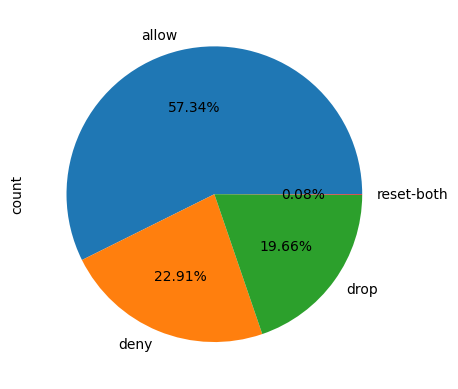

In [224]:
# Plotting the pie chart for the category names
firewall_df["Class"].value_counts().plot(kind="pie", autopct="%.2f%%")

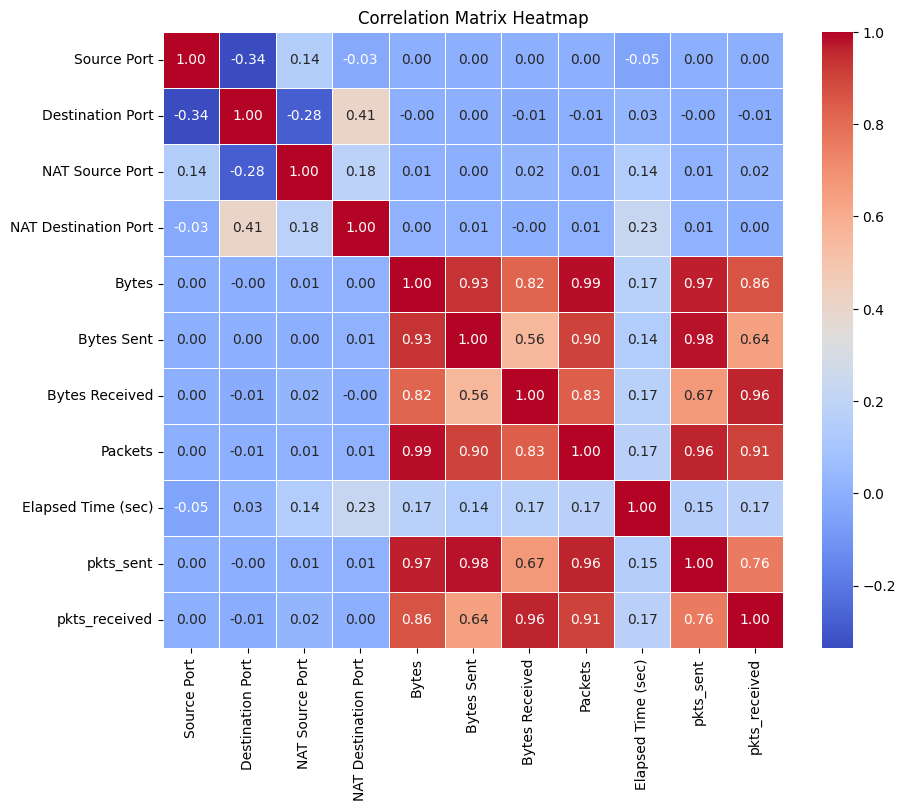

In [225]:
# Correlation Matrix
corr_df = firewall_df.select_dtypes(include=['int64', 'float64'])

if "class" in corr_df.columns:
    corr_df.drop(columns=["class"], inplace=True)

# Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [226]:
# Get upper triangular part of correlation matrix
upper_triangle = correlation_matrix.abs().where(np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1))

# Unstack, sort, and drop duplicates
top_5_correlation = (upper_triangle.unstack()
                      .sort_values(ascending=False)
                      .reset_index()
                      .query('level_0 != level_1')
                      .drop_duplicates(subset=['level_0', 'level_1'])
                      .head(5))

# Rename columns
top_5_correlation.columns = ['Variable 1', 'Variable 2', 'correlation']

print("Top 5 unique pairs of features with the highest correlation values (excluding self-correlations):")
print(top_5_correlation)


Top 5 unique pairs of features with the highest correlation values (excluding self-correlations):
      Variable 1      Variable 2  correlation
0        Packets           Bytes     0.985089
1      pkts_sent      Bytes Sent     0.980635
2      pkts_sent           Bytes     0.967809
3      pkts_sent         Packets     0.962159
4  pkts_received  Bytes Received     0.959234


<ipython-input-227-4f2931917b52>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=firewall_df, x='Class', order=classes, palette=custom_palette)


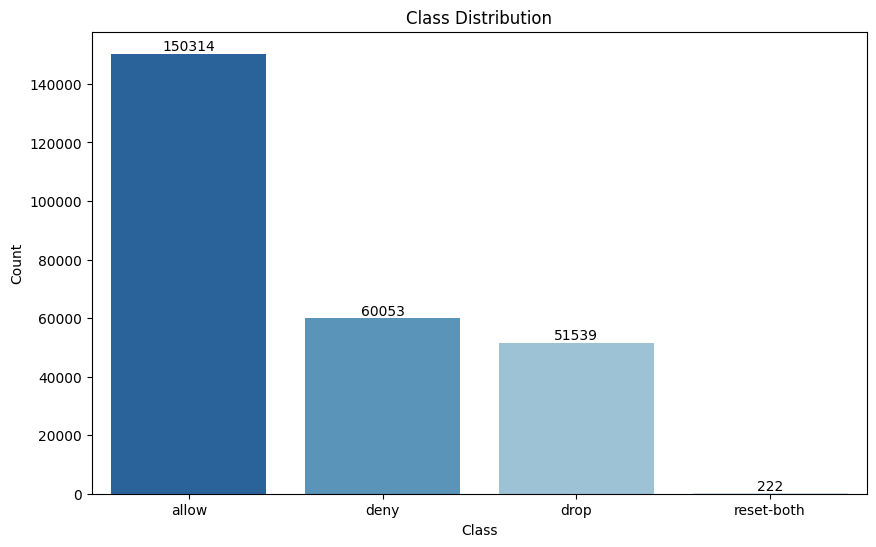

In [227]:
# Reverse the order of the counts and get the corresponding classes
class_counts = firewall_df['Class'].value_counts().sort_values(ascending=False)
classes = class_counts.index

# Define a custom palette with different shades of blue (reversed order)
custom_palette = sns.color_palette("Blues", len(classes))[::-1]

# Create a count plot for the class distribution with custom palette
plt.figure(figsize=(10, 6))
sns.countplot(data=firewall_df, x='Class', order=classes, palette=custom_palette)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Count of class type of top of bar
for index, value in enumerate(class_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

## Code Implementation:
### • Include relevant portions of the Python code used for data preprocessing, model training, and evaluation.
### • Explain the steps involved in training and evaluating each model.

We are following the given steps to train and evaluate the models:


*   **Step 1 - LabelEncoding:** Using the LabelEncoder, we encode the Class column into numerical representation for the models to understand the column better.
*   **Step 2 - Seperate Features and Target:** Using the y and X variable to seperate the features and target.
*   **Step 3 - Standardization:** Using StandardScaler, we will do some preprocessing and standardize the data to improve performance and stability.
*  **Step 4 - Split the data:** Using the usual 80:20 split, we will split the data, 80 percent data to the training set and 20 percent to the testing set. 70:30 is also a common bifurcation.
*   **Step 5 - Classifier Initialization:** We will classify all initializers and store them into variables which resemble their classifier names
*   **Step 6 - List of classifiers:** We will initialzie a list called List to store all the classifiers
*   **Step 7 - Metrics:** We are intializing a metrics dataframe that will store all metrics accuracy, precision, f1-score and recall.
*  **Step 8 - Loop and Run through classifiers list:** Last step is to do a loop through all classifiers and run the classifier. We begin by fitting the classifier to the training data, making predictions on the test data, calculates the metrics and then stores them into the metrics dataframe.
*  **Step 9 - Visualize:** We will visualize the findings where necesary.



In [228]:
# Step 1 - LabelEncoding
def label_encoder(column):
    lencode = LabelEncoder().fit(column)
    print(column.name, lencode.classes_)
    return lencode.transform(column)

firewall_df["class"] = label_encoder(firewall_df["Class"])

Class ['allow' 'deny' 'drop' 'reset-both']


In [229]:
# Step 2 - Seperate Features and Target
y = firewall_df["Class"]
X = firewall_df.drop(columns=["Class"])

In [230]:
# Step 3 - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [231]:
# Step 4 - Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## Models Explored:
### • Use machine learning models Decision Trees, and Random Forest (You can try K-Nearest Neighbors, Naïve Bayes, and Gradient Boosting as well but Decision tree and Random forest are required).
The models used in this project are given below:

1.   **Decision Tree**
2.   **Random Forest**
3.   **Gradient Boosting**
4.   **K-Nearest Neighbor**
5.   **Naive Bayes**: Multinomial and Gaussian



In [232]:
# Step 5 - Classifier Initialization
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier(n_estimators=20, random_state=21)
knn = KNeighborsClassifier()
mnb = MultinomialNB(alpha=0.5, fit_prior=False)
gnb = GaussianNB()

In [233]:
# Step 6 - List of classifiers

classifiers = [
    ("Decision Tree", dt),
    ("Random Forest", rf),
    ("Gradient Boosting", gb),
    ("K-Nearest Neighbors", knn),
    ("Multinomial Naive Bayes", mnb),
    ("Gaussian Naive Bayes", gnb)
]

In [234]:
# Step 7 - Metrics
metrics_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
metrics = pd.DataFrame(columns=metrics_cols)

In [235]:
# Step 8 - Loop and Run through classifiers list
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)

    print("\nClassifier", classifier_name, "successful. Classification Report given:")
    print(classification_report(y_test, y_predict))

    metrics = pd.concat([metrics, pd.DataFrame({
        "Model Name": [classifier_name],
        "Accuracy Score": [accuracy_score(y_test, y_predict)],
        "F1 Score": [f1_score(y_test, y_predict, average='weighted')],
        "Precision Score": [precision_score(y_test, y_predict, average='weighted')],
        "Recall Score": [recall_score(y_test, y_predict, average='weighted')]
    })], ignore_index=True)


Classifier Decision Tree successful. Classification Report given:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     30104
        deny       1.00      1.00      1.00     11996
        drop       1.00      1.00      1.00     10282
  reset-both       1.00      1.00      1.00        44

    accuracy                           1.00     52426
   macro avg       1.00      1.00      1.00     52426
weighted avg       1.00      1.00      1.00     52426


Classifier Random Forest successful. Classification Report given:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     30104
        deny       1.00      1.00      1.00     11996
        drop       1.00      1.00      1.00     10282
  reset-both       1.00      1.00      1.00        44

    accuracy                           1.00     52426
   macro avg       1.00      1.00      1.00     52426
weighted avg       1.00      1.00      1.00     524

## Results and Analysis:
### • Provide a summary of the results obtained from each classifier model.

In [236]:
metrics

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Gradient Boosting,0.998989,0.998988,0.998991,0.998989
3,K-Nearest Neighbors,0.998321,0.998308,0.998325,0.998321
4,Multinomial Naive Bayes,0.509518,0.582754,0.958295,0.509518
5,Gaussian Naive Bayes,0.690211,0.774905,0.969712,0.690211


In [237]:
models = metrics["Model Name"].values
accuracy = metrics["Accuracy Score"].values
f1 = metrics["F1 Score"].values
precision = metrics["Precision Score"].values
recall = metrics["Recall Score"].values

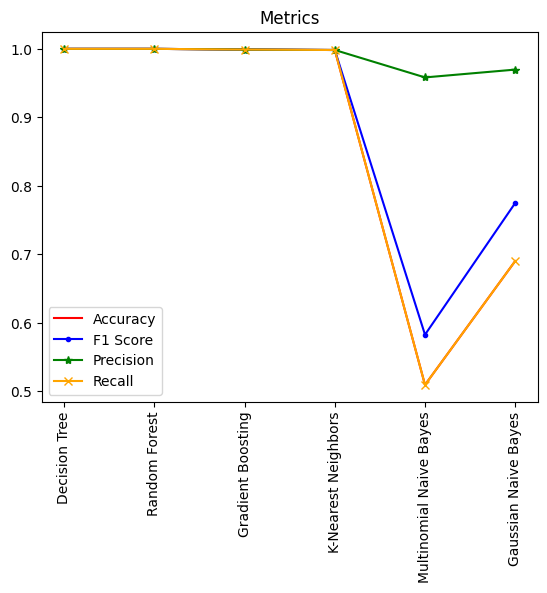

In [241]:
# Assuming 'models', 'accuracy', 'f1', 'precision', and 'recall' are defined

plt.figure()
plt.title('Metrics')
plt.plot(models, accuracy, color="red", marker=",", label="Accuracy")
plt.plot(models, f1, color="blue", marker=".", label="F1 Score")
plt.plot(models, precision, color="green", marker="*", label="Precision")
plt.plot(models, recall, color="orange", marker="x", label="Recall")
plt.xticks(rotation=90)
plt.legend()  # Add legend
plt.show()


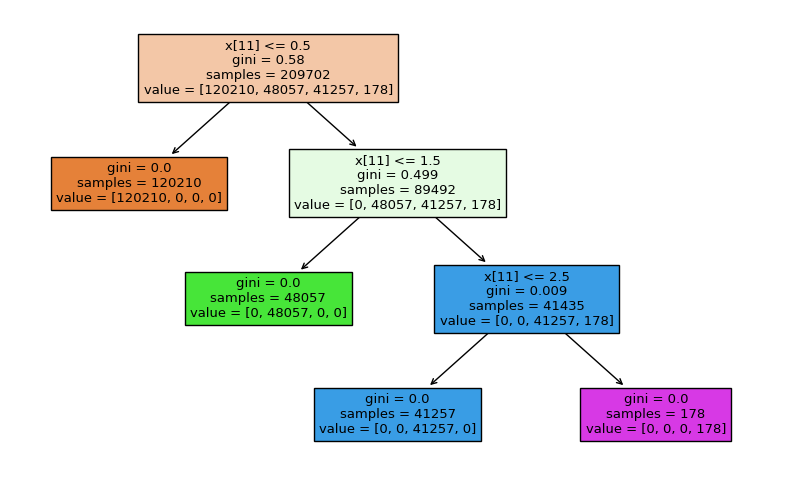

In [242]:
# Step 9 - Visualize

# Visualizing Decision Tree
# Fit the classifier
dt.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
tree.plot_tree(dt, filled=True)
plt.show()

In [243]:
# Initialize an empty dictionary to store feature importances for each classifier
all_features_importances = {}

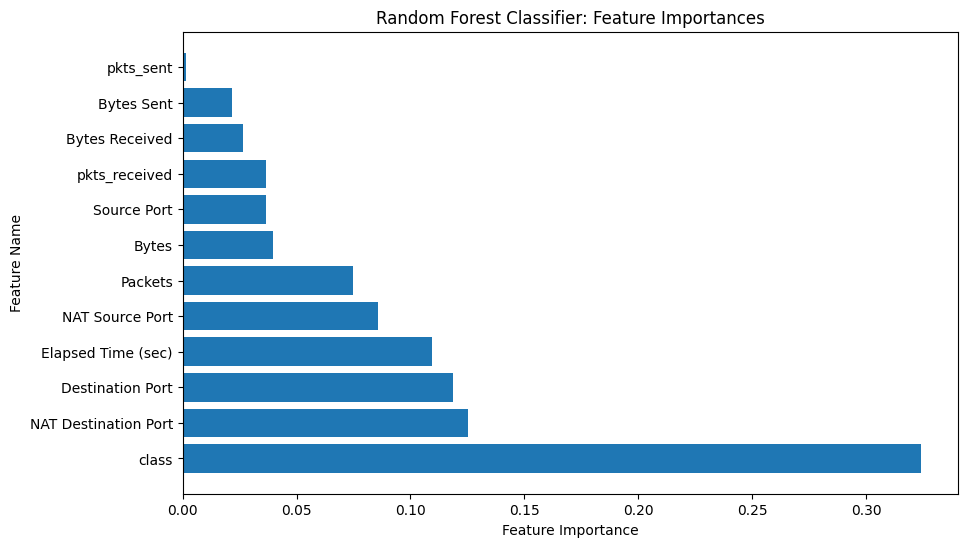

In [244]:
# Train the Random Forest classifier
rf.fit(X_train, y_train)

# Retrieve feature importances and feature names
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Create a dictionary to map feature importances to feature names
features_named = dict(zip(feature_names, feature_importances))

# Store feature importances for Random Forest
all_features_importances["Random Forest"] = features_named

# Sort feature importances
sorted_feature_importances = sorted(features_named.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
sorted_feature_names = [x[0] for x in sorted_feature_importances]
sorted_importances = [x[1] for x in sorted_feature_importances]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Classifier: Feature Importances')
plt.show()

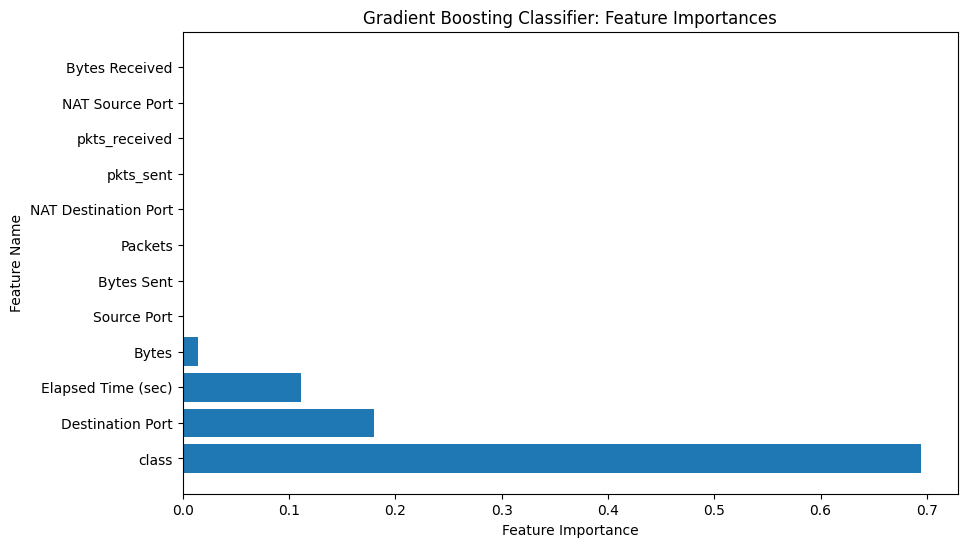

In [245]:
# Train the Gradient Boosting classifier
gb.fit(X_train, y_train)

# Retrieve feature importances and feature names
feature_importances = gb.feature_importances_
feature_names = X_train.columns

# Create a dictionary to map feature importances to feature names
features_named = dict(zip(feature_names, feature_importances))

# Store feature importances for Gradient Boosting
all_features_importances["Gradient Boosting"] = features_named

# Sort feature importances
sorted_feature_importances = sorted(features_named.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
sorted_feature_names = [x[0] for x in sorted_feature_importances]
sorted_importances = [x[1] for x in sorted_feature_importances]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Gradient Boosting Classifier: Feature Importances')
plt.show()

## Conclusion:
### • Summarize the key findings and the most effective model for this firewall rule classification task.
### • Discuss any insights gained from the analysis and results.

**Key insights and Findings**

1. The dataset has 12 columns, and a total of 262128 rows.

2. Top 5 columns with the most correlation:
  
| Pair                    | Correlation Value |
|-------------------------|-------------------|
| a. Bytes - Packets      | 0.985089          |
| b. Bytes Sent - pkts_sent | 0.980635        |
| c. Bytes - pkts_sent    | 0.967809          |
| d. Packets - pkts_sent  | 0.962159          |
| e. Bytes Received - pkts_received | 0.959234 |


3. Class distribution is as follows:

| Class       | Count   |
|-------------|---------|
| a. allow    | 150314  |
| b. deny     | 60053   |
| c. drop     | 51539   |
| d. reset-both | 222   |


4. Ranking of models based on their efficiency:

    1. (Tie) Decision Tree and random Forest
    2. Gradient Boosting
    3. K-Nearest Neighbor
    4. Gaussian Naïve Bayes
    5. Multinomial Naïve Bayes

  Here is the report:

| Model Name               | Accuracy Score | F1 Score   | Precision Score | Recall Score |
|--------------------------|----------------|------------|-----------------|--------------|
| 1. Decision Tree         | 1.000000       | 1.000000   | 1.000000        | 1.000000     |
| 2. Random Forest         | 1.000000       | 1.000000   | 1.000000        | 1.000000     |
| 3. Gradient Boosting     | 0.998989       | 0.998988   | 0.998991        | 0.998989     |
| 4. K-Nearest Neighbors   | 0.998321       | 0.998308   | 0.998325        | 0.998321     |
| 5. Multinomial Naive Bayes | 0.509518    | 0.582754   | 0.958295        | 0.509518     |
| 6. Gaussian Naive Bayes  | 0.690211       | 0.774905   | 0.969712        | 0.690211     |



  Therefore, I would recommend using a Decision Tree or a Random Forest for the classification of the firewall rules.

5. In terms of Random Forest, the features_importances shows that the following features are important:
  
| Feature               |
|-----------------------|
| a. Class              |
| b. Elapsed time (sec)  |
| c. Destination port      |
| d. NAT Source port  |
| e. NAT Destination port|


6. In terms of gradient boosting, the following features are of importance:

| Feature            |
|--------------------|
| a. Class           |
| b. Destination Port|
| c. Elapsed time    |
| d. Bytes           |

The features importance are in accordance to what one can expect with a firewall rule. Depending on the elapsed time, the firewall may allow, drop, or deny the packet. For example, if the time it takes is unusally high, it may mean that there is an ongoing attack or breach. Destination port can also be an indicator of compromise, and malicious attacks may happen. Port scanning is one way where hackers can find open ports and attack. Therefore, a dropping of packet in this case is advisable.


## Further Exploration:
### • Suggest potential avenues for further exploration or improvement in the model.
### • Are there additional features or techniques that could enhance the model's performance?

Some of the ways that we can improve the model are the following:


1.   We can include external or additional data sources that augment the functionality of the firewall dataset, and also for the models. An example is including data from Threat Intelligence feeds.
2.   We can perform hyperparameter tuning for some of the models we have used in the assignment. A grid seacrh can be conducted in order to find the optimal combination of hyperparameters. This can include experimenting with different values of tree depth, learning rate, etc. to find the right combination.
3.   We can derive additional features based on the features already present in the dataset. Some examples of additional features are packet size, packet rate, or bytes per packet.
4.   Using more advanced models such as neural networks can enhance the efficiency of the model. We can also experiment with advanced ensemble models such as XGBoost and LighGBM for further efficiency.



